<a href="https://colab.research.google.com/github/renatoquiliche/DataScience-PUCRio-FB/blob/main/Task%202/Evaluation/Bianca_Esther.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(ISLR)
require(tree)
library(rpart)
library(rpart.plot)
library(mccr)
require(mccr)
library(dplyr)
library(caret)
library(fastDummies)

In [ ]:
##Carregar o dataset##

dados <- read.csv("https://raw.githubusercontent.com/renatoquiliche/DataScience-PUCRio-FB/main/Data/DS_salarios/ds_salaries.csv")

dados$salary_in_usd = dados$salary_in_usd/1000

In [ ]:
#Pre-processing
#1. Transform the categorical features into binary variables (dummy variables). Dummy variables are accepted by almost any classifier. (1 point)

str(dados)
table(dados$company_size)
head(dados)
glimpse(dados)


input_variables <- dados[,c('company_size', 'remote_ratio'
                            , 'work_year', 'job_title', 'experience_level'
                            , 'employment_type', 'employee_residence'
                            , 'company_location', 'salary_in_usd')]


final_data <- dummy_cols(input_variables, select_columns = c('work_year', 'job_title', 'experience_level'
                                                             , 'employment_type', 'employee_residence'
                                                             , 'company_location'), remove_selected_columns = TRUE)



'data.frame':	607 obs. of  13 variables:
 $ X                 : int  0 1 2 3 4 5 6 7 8 9 ...
 $ work_year         : int  2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 ...
 $ work_month        : int  6 11 12 6 10 8 2 1 2 6 ...
 $ experience_level  : chr  "MI" "SE" "SE" "MI" ...
 $ employment_type   : chr  "FT" "FT" "FT" "FT" ...
 $ job_title         : chr  "Data Scientist" "Machine Learning Scientist" "Big Data Engineer" "Product Data Analyst" ...
 $ salary            : int  70000 260000 85000 20000 150000 72000 190000 11000000 135000 125000 ...
 $ salary_currency   : chr  "EUR" "USD" "GBP" "USD" ...
 $ salary_in_usd     : num  79.8 260 109 20 150 ...
 $ employee_residence: chr  "DE" "JP" "GB" "HN" ...
 $ remote_ratio      : int  0 0 50 0 50 100 100 50 100 50 ...
 $ company_location  : chr  "DE" "JP" "GB" "HN" ...
 $ company_size      : chr  "L" "S" "M" "S" ...



  L   M   S 
198 326  83 

,X,work_year,work_month,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>
1,0,2020,6,MI,FT,Data Scientist,70000,EUR,79.833,DE,0,DE,L
2,1,2020,11,SE,FT,Machine Learning Scientist,260000,USD,260.000,JP,0,JP,S
3,2,2020,12,SE,FT,Big Data Engineer,85000,GBP,109.024,GB,50,GB,M
4,3,2020,6,MI,FT,Product Data Analyst,20000,USD,20.000,HN,0,HN,S
5,4,2020,10,SE,FT,Machine Learning Engineer,150000,USD,150.000,US,50,US,L
6,5,2020,8,EN,FT,Data Analyst,72000,USD,72.000,US,100,US,L


Rows: 607
Columns: 13
$ X                  <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1…
$ work_year          <int> 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 202…
$ work_month         <int> 6, 11, 12, 6, 10, 8, 2, 1, 2, 6, 4, 4, 10, 11, 12, …
$ experience_level   <chr> "MI", "SE", "SE", "MI", "SE", "EN", "SE", "MI", "MI…
$ employment_type    <chr> "FT", "FT", "FT", "FT", "FT", "FT", "FT", "FT", "FT…
$ job_title          <chr> "Data Scientist", "Machine Learning Scientist", "Bi…
$ salary             <int> 70000, 260000, 85000, 20000, 150000, 72000, 190000,…
$ salary_currency    <chr> "EUR", "USD", "GBP", "USD", "USD", "USD", "USD", "H…
$ salary_in_usd      <dbl> 79.833, 260.000, 109.024, 20.000, 150.000, 72.000, …
$ employee_residence <chr> "DE", "JP", "GB", "HN", "US", "US", "US", "HU", "US…
$ remote_ratio       <int> 0, 0, 50, 0, 50, 100, 100, 50, 100, 50, 0, 0, 0, 10…
$ company_location   <chr> "DE", "JP", "GB", "HN", "US", "US", "US", "HU", "US…
$ company_size    

In [ ]:
## Partição de dados
#make this example reproducible
set.seed(0)

#create ID column
final_data$id <- 1:nrow(final_data)

#use 70% of dataset as training set and 30% as test set 
train_size = 0.7

train <- final_data %>% dplyr::sample_frac(train_size)
test  <- dplyr::anti_join(final_data, train, by = 'id')
table(train$company_size)
table(test$company_size)


  L   M   S 
132 234  59 


 L  M  S 
66 92 24 

Call:
rpart(formula = company_size ~ ., data = train, method = "class", 
    maxdepth = 3)
  n= 425 

          CP nsplit rel error    xerror       xstd
1 0.29842932      0 1.0000000 1.0000000 0.05369042
2 0.02617801      1 0.7015707 0.7015707 0.05015001
3 0.01047120      2 0.6753927 0.7329843 0.05072927
4 0.01000000      3 0.6649215 0.7329843 0.05072927

Variable importance
                   id        work_year_2022        work_year_2021 
                   27                    27                    20 
        salary_in_usd   experience_level_SE employee_residence_US 
                    9                     9                     8 
         remote_ratio 
                    1 

Node number 1: 425 observations,    complexity param=0.2984293
  predicted class=M  expected loss=0.4494118  P(node) =1
    class counts:   132   234    59
   probabilities: 0.311 0.551 0.139 
  left son=2 (205 obs) right son=3 (220 obs)
  Primary splits:
      work_year_2022      < 0.5     to the left,  i

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  L   L   L   L   L   L   L   L   L   L   L   L   L   L   L   L   L   L   L   L 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  L   L   L   L   L   L   L   L   L   L   L   L   L   L   M   M   L   L   L   L 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  L   S   L   L   L   L   L   L   L   L   L   S   L   L   L   L   L   L   L   L 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  L   L   L   L   L   L   L   S   L   L   L   L   L   L   L   S   L   L   L   L 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  L   L   L   L   M   M   M   M   M   M   M   M   M   M   M   M   M   M   M   M 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  M   M   M   M   M   M   M   M   M   M   M   M   M   M   M   M   M   M   M   M 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  M   M   M   M   M   M   M   M   M   M   M   M   M   M   M   M   M   M   M   M 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  M   M   M   M   M   M   M   M   M   M   M   M   M   M   M   M   M   M   M   M 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 
  M   M   M   M   M   M   M   M   M   M   M   M   M   M   M   M   M   M   M   M 
181 182 
  M   M 
Levels: L M S

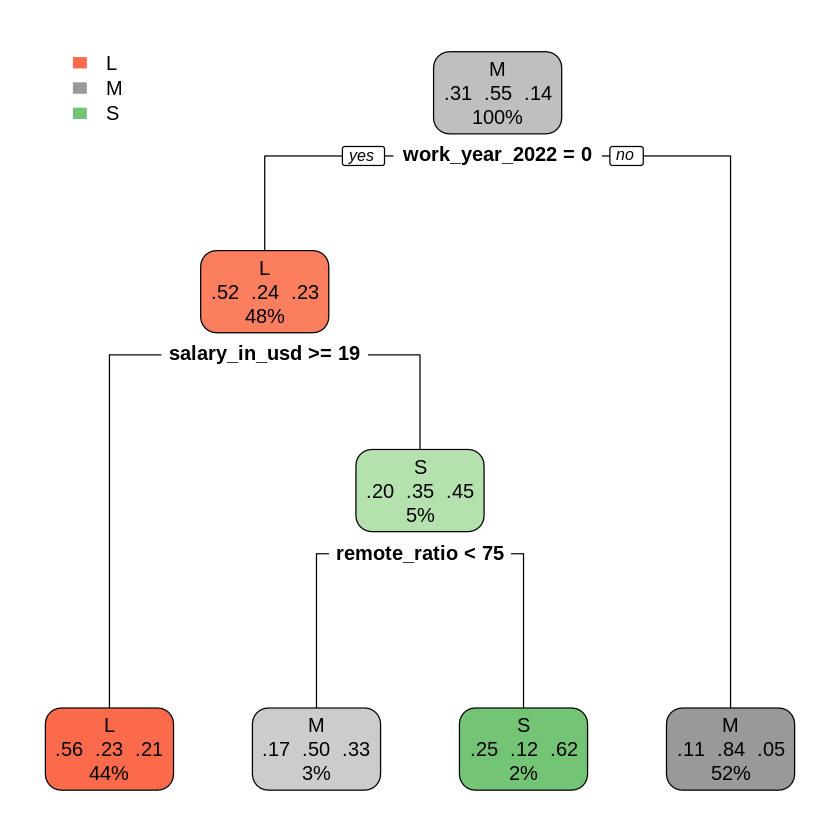

In [ ]:
#Processing
#2. Fit a Decision Tree to classify the size of company in which each data scientist work. 
#This is represented by the feature ‘company_size’, which is the target variable.
#2.1
set.seed(100)
tree_model <- rpart(company_size~., data = train, method = 'class', maxdepth=3)
summary(tree_model)
rpart.plot(tree_model, extra=104)

#2.2 - Plot the decision tree
#To predict on test data
rpart.predict(tree_model, test, type='class')

In [ ]:
#3. Interpret the results of the decision tree (3 points)
#3.1. Write a paragraph interpreting the structure of the decision tree.

Baseado nessas features inicias, pode-se observar que foram definidas três classes S,M,L, que representam os respectivos tamanhos das companhias (pequena, média e grande). A árvore de decisão é constituída por frequências para cada tamanho da companhia, e no primeiro nó de decisão da árvore, foi observado que o tamanho da companhia M tem a maior frequência (55%) em relação às demais. A categoria work_year_2022 foi a melhor avaliada, e quando está igual a 0, vimos que foram representados nós de ramificações para uma tomada de decisão que será realizada. Isso posto, quando a decisão for sim, temos que 48% do resultado da decisão é o tamanho da companhia L, pois tem a maior frequência, e se for não temos que 52% do resultado da decisão é o tamanho da companhia M. Diante dessa decisão, foi representado outro nó de decisão com a segunda melhor categoria representada na árvore, no qual o salary_in usd >= 19e+3 obteve o melhor desempenho. As alternativas de ramificações seguem o mesmo conceito que a primeira categoria, quando for sim, temos que 44% do resultado da decisão é o tamanho da companhia L, e se for não, temos que 5% do resultado da decisão é o tamanho da companhia S, ambos pelo mesmo motivo de exibirem as maiores frequências. Com isso, é criado outro nó de decisão com a terceira melhor categoria na árvore de decisão, que foi o remote_ratio<75. Nessa última análise da árvore, já que o exercício propôs no máximo 3 nós de decisão, temos que se a decisão for sim, 3% do resultado é o tamanho da companhia M, e ao contrário, e se for não, 2% do resultado é o tamanho da companhia S. Dessa maneira, a árvore de decisão foi representada a fim de aprimorar a performance dos métodos de classificação que foram expostos, além disso a companhia ser capaz de comparar possíveis ações com base em seus custos, probabilidades e benefícios.


In [ ]:
#4. Measure the performance of the decision tree to make accurate predictions.
#4.1. By hold-out cross-validation performance (3 points)
#4.1.1. Estimate the accuracy, interpret the results. (1.5 points)

predict_unseen <- predict(tree_model, test, type = 'class')


table_mat <- table(test$company_size, as.numeric(predict_unseen))
table_mat
accuracy_Test <- sum(diag(table_mat)) / sum(table_mat)
print(paste('Accuracy for test data:', accuracy_Test))

#A acurácia deu 0.67032967032967, mas isso não quer dizer que a acurária é realmente boa, pois os dados estão desbalanceados.

#4.1.2. Estimate the Matthews correlation coefficient, interpret the results (1.5 points)

test$company_size <- ifelse(test$company_size=="S", 0,
                            ifelse(test$company_size=="M", 1,
                                   2))

predict_unseen <- ifelse(predict_unseen=="S", 0,
                         ifelse(predict_unseen=="M", 1,
                                2))

print(paste('Phi coefficient for test data:', mccr(test$company_size,predict_unseen)))


# Matthews correlation coefficient tem menos viés, logo está mais próximo da acurácia "certa" do modelo

   
     1  2  3
  L 44 21  1
  M 15 76  1
  S 19  3  2

[1] "Accuracy for test data: 0.67032967032967"
[1] "Phi coefficient for test data: 0.493266623946223"
